In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as spo
import uncertainties
from uncertainties import unumpy
from scipy import stats

In [15]:
def Sens_curves(option_opsins):
    
    if option_opsins==0:
        ##### Raw opsin responses
        N_points = 13
        raw = np.loadtxt("Data/Opsins_raw.txt")
        idx = np.array(np.linspace(0,raw[0,:].size-1, N_points),dtype=int)
        return raw[-1,idx], raw[0,idx], raw[1,idx], raw[2,idx], raw[3,idx]
        
    if option_opsins==1:
        ##### Fitted opsin responses HC-blocked
        N_points = 30
        fit = np.loadtxt("Data/Opsins_fit.txt")
        idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
        return fit[-1,idx], fit[0,idx], fit[1,idx], fit[2,idx], fit[3,idx]
    
    if option_opsins==2:
        ##### Functional opsin curves
        Red_ops = np.loadtxt("Data/Functional_trace_OpsinR.txt")
        Green_ops = np.loadtxt("Data/Functional_trace_OpsinG.txt")
        Blue_ops = np.loadtxt("Data/Functional_trace_OpsinB.txt")
        UV_ops = np.loadtxt("Data/Functional_trace_OpsinU.txt")
        l_array = np.loadtxt("Data/Functional_trace_Opsin_wavelength.txt")
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
    
        return np.flip(l_array), (Red_mean), (Green_mean), (Blue_mean), (UV_mean)

In [3]:
def cost_function(params):
    hr, hg = params[0], params[1]
    beta_ex = 1
    beta_inh = 1
    return (-hr + Ir + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + (Whr+Whg) ) ) + Wrg*np.tanh(beta_ex*hg) + (Wrh + Wrg))**2 + (-hg + Ig + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + (Whr+Whg) ) ) + Wgr*np.tanh(beta_ex*hr) + (Wgh + Wgr))**2 

In [4]:
def Nullcline1(hr, hg):
    beta_ex = 1
    beta_inh = 1
    return (-hr + Ir + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + (Whr+Whg) ) ) + Wrg*np.tanh(beta_ex*hg) + (Wrh + Wrg))**2

In [5]:
def Nullcline2(hg, hr):
    beta_ex = 1
    beta_inh = 1
    return (-hg + Ig + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + (Whr+Whg) ) ) + Wgr*np.tanh(beta_ex*hr) + (Wgh + Wgr))**2

In [6]:
def Nullcline_plot():
    hr_null1 = 0.
    hr_null2 = 0.
    hg_null1 = 0.
    hg_null2 = 0.
    for hh in np.linspace(-6,6,1000):
        ite1 = 0
        count1 = 0
        hg = hh
        while ite1==0:
            count1+=1
            hr_init = np.random.normal()
            result1 = spo.minimize(Nullcline1, hr_init, args = hg)
            if result1.fun<0.01:
                hr_null1 = np.append(hr_null1, result1.x)
                hg_null1 = np.append(hg_null1, hg)
                ite1=1
            if count1>10:
                print("issue_1")
        count2 = 0
        ite2 = 0
        hr = hh
        while ite2==0:
            count2+=1
            hg_init = np.random.normal()
            result2 = spo.minimize(Nullcline2, hg_init, args = hr)
            if result2.fun<0.01:
                hg_null2 = np.append(hg_null2, result2.x)
                hr_null2 = np.append(hr_null2, hr)
                ite2=1
            if count2>10:
                print("issue_2")
    
### Fixed points    
    wh_ite=0
    while(wh_ite == 0):
        params = np.random.normal(0,1,2)
        result = spo.minimize(cost_function, params)
        if result.fun<0.1:     
            x = np.round(result.x[0], decimals=1)
            y = np.round(result.x[1], decimals=1)
            wh_ite = 1

    x = np.array([0])
    y = np.array([0])
    for i in range(10):
        params = np.random.normal(0,1,2)
        result = spo.minimize(cost_function, params)
        if result.fun<0.1: 
            x = np.append(x, np.round(result.x[0], decimals=1))
            y = np.append(y, np.round(result.x[1], decimals=1))
    fixed_x = np.unique(x[1:])
    fixed_y = np.unique(y[1:])  

    return hr_null1, hr_null2, hg_null1, hg_null2, fixed_x, fixed_y

In [59]:
def FixedPoints(fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up, par_, par):
    wh_ite=0
    while(wh_ite == 0):
        params = np.random.normal(0,1,2)
        result = spo.minimize(cost_function, params)
        if result.fun<0.1:     
            x = np.round(result.x[0], decimals=2)
            y = np.round(result.x[1], decimals=2)
            wh_ite = 1
    x = np.array([0])
    y = np.array([0])
    for i in range(30):
        params = np.random.normal(0,1,2)
        result = spo.minimize(cost_function, params)
        if result.fun<0.00001: 
            x = np.append(x, np.round(result.x[0], decimals=2))
            y = np.append(y, np.round(result.x[1], decimals=2))
    if x.size>1:
        fixed_x = np.unique(x[1:])
        fixed_y = np.unique(y[1:])  
        if np.logical_and(fixed_x.size==1, fixed_y.size==1):
            fx = np.append(fx, fixed_x)
            fy = np.append(fy, fixed_y)
            par = np.append(par, Wrg)
        if np.logical_and(fixed_x.size==3, fixed_y.size==3):
            fx_low = np.append(fx_low, fixed_x[0])
            fy_low = np.append(fy_low, fixed_y[0])
            fx_med = np.append(fx_med, fixed_x[1])
            fy_med = np.append(fy_med, fixed_y[1])
            fx_up = np.append(fx_up, fixed_x[2])
            fy_up = np.append(fy_up, fixed_y[2])
            par_ = np.append(par_, Wrg)

    return fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up, par_, par

In [8]:
def DynSys(h, Wrh, Whr, Wgh, Whg, Wrg, Wgr, Ir, Ig):
    hr, hg = h
    beta_inh = 1
    beta_ex = 1
    return [-hr + Ir + Wrh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + (Whr+Whg) ) ) + Wrg*np.tanh(beta_ex*hg) + (Wrh + Wrg), -hg + Ig + Wgh*np.tanh( beta_inh*( Whr*np.tanh(beta_ex*hr) + Whg*np.tanh(beta_ex*hg) + (Whr+Whg) ) ) + Wgr*np.tanh(beta_ex*hr) + (Wgh + Wgr) ]

In [32]:
L_array, R, G, B, _ = Sens_curves(1)
for i in range(13):
    print(L_array[i], np.round(R[i] , decimals = 1), np.round(G[i], decimals = 1))

350.0 0.5 0.6
360.1694915254237 0.5 0.6
370.33898305084745 0.5 0.6
380.50847457627117 0.5 0.6
390.6779661016949 0.5 0.7
400.8474576271186 0.4 0.7
412.03389830508473 0.4 0.8
422.20338983050846 0.4 0.9
432.3728813559322 0.4 0.9
442.54237288135596 0.5 1.0
452.7118644067797 0.5 1.0
462.8813559322034 0.6 1.0
474.06779661016947 0.7 1.0


0.5 0.7


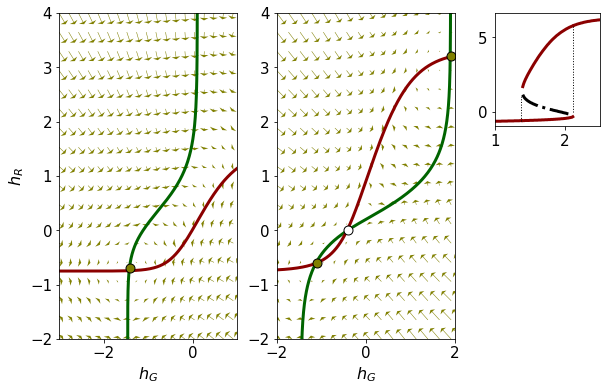

In [33]:
_, R, G, B, _ = Sens_curves(1)
Ir = np.round(R[4], decimals = 1) #380 nm
Ig = np.round(G[4], decimals = 1)
print(Ir, Ig)
Wrh = -1.7
Whr = 1.5
Wgh = -1.1
Whg = 0.9 

### Nullclines and Phase portrait
# fig = plt.figure(figsize=(13,5))
fig = plt.figure(figsize=(11, 6))
Grid = plt.GridSpec(8, 9, wspace = 1.2, hspace = 0.5)
p1 = fig.add_subplot(Grid[:, :3])
p2 = fig.add_subplot(Grid[:, 3:6])
# p3 = fig.add_subplot(Grid[:3, 6:])
p3 = fig.add_subplot(Grid[:3, 6:8])

alpha = 0.2
points = 0 #To plot the intersection points of only one set of parameters
points1 = 0
for Wrg in np.arange(1.5, 4, 0.3):
    Wgr = Wrg
    hr_null1, hr_null2, hg_null1, hg_null2, fixed_x, fixed_y = Nullcline_plot()

#     p1.plot(hr_null1[1:], hg_null1[1:], color='darkgreen', label='Wrg='+str(Wrg), alpha=alpha)
#     p1.plot(hr_null2[1:], hg_null2[1:], color='darkred', alpha=alpha)
#     p2.plot(hr_null1[1:], hg_null1[1:], color='darkgreen', label='Wrg='+str(Wrg), alpha=alpha)
#     p2.plot(hr_null2[1:], hg_null2[1:], color='darkred', alpha=alpha)

    if fixed_x.size==1:
        points1 += 1
        if points1==1:
            alpha = 1
            
            y1 = np.linspace(-3.0, 2.0, 24)
            y2 = np.linspace(-2.0, 4.0, 18)
            Y1, Y2 = np.meshgrid(y1, y2)
            Z1, Z2 = np.meshgrid(y1, y2)
            u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
            w, o = np.zeros(Z1.shape), np.zeros(Z2.shape)
            NI, NJ = Y1.shape
            NI2, NJ2 = Z1.shape
            for i in range(NI):
                for j in range(NJ):
                    x = Y1[i, j]
                    y = Y2[i, j]
                    yprime = DynSys([x, y], Wrh, Whr, Wgh, Whg, Wrg, Wgr, Ir, Ig)
                    u[i,j] = yprime[0]
                    v[i,j] = yprime[1]

            Q = p1.quiver(Y1, Y2, u, v, color='olive', headwidth = 17, scale = 86)
            p1.plot(hr_null1[1:], hg_null1[1:], color='darkgreen', label='Wrg='+str(Wrg), alpha=alpha, linewidth = 3)
            p1.plot(hr_null2[1:], hg_null2[1:], color='darkred', alpha=alpha, linewidth = 3)
            p1.plot(fixed_x, fixed_y, marker='.', linestyle='none', color='olive', markersize=18, markeredgecolor='k')
    alpha = 0.2
    
    if fixed_x.size>2:
        points += 1
        if points==2:
            alpha = 1
            y1 = np.linspace(-2.0, 4.0, 24)
            y2 = np.linspace(-2.0, 4.0, 18)
            Y1, Y2 = np.meshgrid(y1, y2)
            Z1, Z2 = np.meshgrid(y1, y2)
            u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
            w, o = np.zeros(Z1.shape), np.zeros(Z2.shape)
            NI, NJ = Y1.shape
            NI2, NJ2 = Z1.shape
            for i in range(NI):
                for j in range(NJ):
                    x = Y1[i, j]
                    y = Y2[i, j]
                    yprime = DynSys([x, y], Wrh, Whr, Wgh, Whg, Wrg, Wgr, Ir, Ig)
                    u[i,j] = yprime[0]
                    v[i,j] = yprime[1]

            Q = p2.quiver(Y1, Y2, u, v, color='olive', headwidth = 15, scale = 86)
            p2.plot(hr_null1[1:], hg_null1[1:], color='darkgreen', label='Wrg='+str(Wrg), alpha=alpha, linewidth = 3)
            p2.plot(hr_null2[1:], hg_null2[1:], color='darkred', alpha=alpha, linewidth = 3)
            p2.plot(np.array([fixed_x[0], fixed_x[2]]), np.array([fixed_y[0], fixed_y[2]]), marker='.', linestyle='none', color='olive', markersize=18, markeredgecolor='k')
            p2.plot(fixed_x[1], fixed_y[1], marker='.', linestyle='none', color='white', markersize=18, markeredgecolor='k')
    alpha = 0.2
    
fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up = np.zeros(8)
par, par_ = np.zeros(2)    
for Wrg in np.arange(1, 3.5, 0.01):
# for Wrg in np.arange(1, 3.5, 0.5):
    fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up, par_, par = FixedPoints(fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up, par_, par)
    
idx1 = np.where(fy<0)[0]
idx2 = np.where(fy>0)[0]

p3.plot(par[idx1], fy[idx1], linestyle='-', color='darkred', linewidth = 3)
p3.plot(par[idx2], fy[idx2], linestyle='-', color='darkred', linewidth = 3)
p3.plot(par_[1:], fy_low[1:], linestyle='-', color='darkred', linewidth = 3)
p3.plot(par_[1:], fy_med[1:], linestyle='-.', color='k', linewidth = 3)
p3.plot(par_[1:], fy_up[1:], linestyle='-', color='darkred', linewidth = 3)

p3.plot(np.array([ par[idx1[-1]], par[idx1[-1]] ]), np.array([ fy[idx1[-1]], np.max(fy_med[:]) ]), linestyle=':', color='k', linewidth = 1)
p3.plot(np.array([ par_[-1], par_[-1] ]), np.array([ np.max(fy_low[:]), np.max(fy_up[:]) ]), linestyle=':', color='k', linewidth = 1)

# p3.set_xlabel("Excitatory coupling", fontsize=14)
# p3.set_ylabel(r"$h_{R}$", fontsize=14)
p3.tick_params(labelsize=15)
p3.set_xlim(1, 2.5)
p1.set_xlim(-3, 1)
p1.set_ylim(-2, 4)
# p1.set_xticklabels([])
p1.set_xlabel(r"$h_{G}$", fontsize = 16)
p1.set_ylabel(r"$h_{R}$", fontsize = 16)
# p2.set_yticklabels([])
p1.tick_params(labelsize=15)
p2.set_xlim(-2, 2)
p2.set_ylim(-2, 4)
p2.set_xlabel(r"$h_{G}$", fontsize = 16)
p2.tick_params(labelsize=15)
plt.show()

### Matrix Networks

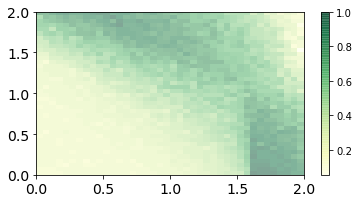

In [28]:
N_FixPoints_ = np.loadtxt("Data/Modified/N_FixPoints_Step0.5.txt") #Data from cluster

plt.figure(figsize=(6, 3))
plt.imshow(np.flip(N_FixPoints_, axis=0)/np.max(N_FixPoints_), extent = [0, 2, 0, 2], aspect = 'auto', interpolation = 'nearest', cmap='YlGn', alpha=0.5)
plt.tick_params(labelsize = 14)
plt.colorbar()

#### Distance between responses

In [64]:
def FP_distance(fx_, fy_, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up, par_, par):
    fx = np.array([fx_])
    fy = np.array([fy_])
    wh_ite=0
    while(wh_ite == 0):
        params = np.random.normal(0,1,2)
        result = spo.minimize(cost_function, params)
        if result.fun<0.1:     
            x = np.round(result.x[0], decimals=2)
            y = np.round(result.x[1], decimals=2)
            wh_ite = 1
    x = np.array([0])
    y = np.array([0])
    for i in range(30):
        params = np.random.normal(0,1,2)
        result = spo.minimize(cost_function, params)
        if result.fun<0.00001: 
            x = np.append(x, np.round(result.x[0], decimals=2))
            y = np.append(y, np.round(result.x[1], decimals=2))
    if x.size>1:
        fixed_x = np.unique(x[1:])
        fixed_y = np.unique(y[1:])  
        if np.logical_and(fixed_x.size==1, fixed_y.size==1):
            fx = np.append(fx, fixed_x)
            fy = np.append(fy, fixed_y)
            par = np.append(par, Wrg)
        if np.logical_and(fixed_x.size==3, fixed_y.size==3):
            fx = np.append(fx, fixed_x)
            fy = np.append(fy, fixed_y)
            fx_low = np.append(fx_low, fixed_x[0])
            fy_low = np.append(fy_low, fixed_y[0])
            fx_med = np.append(fx_med, fixed_x[1])
            fy_med = np.append(fy_med, fixed_y[1])
            fx_up = np.append(fx_up, fixed_x[2])
            fy_up = np.append(fy_up, fixed_y[2])
            par_ = np.append(par_, Wrg)

    return fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up, par_, par

In [65]:
#-------- Opsin curves ------------------
Combination = 0
option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.

if Combination == 0:
    L, R, G, _, _ = Sens_curves(option_opsins) # Red and Green combination
if Combination == 1:
    L, R, _, G, _ = Sens_curves(option_opsins) # Red and Blue combination
if Combination == 2:
    L, _, R, G, _ = Sens_curves(option_opsins) # Red and Green combination
    
#-------- General parameters ---------

# idx_stim , Wrh, Whr, Wgh, Whg = 12, 0.1, 0.3, 0.2, 0.3
Wrg_array = np.linspace(0,4,200)

Ir = 0.2
Ig = 0.7
Wrh = -1.7
Whr = 1.5
Wgh = -1.1
Whg = 0.9

In [66]:
# R_fp1 = np.sqrt((fx_low - fx_up)**2 + (fy_low - fy_up)**2) # distance between fixed point 1 and 3
# N_fp = R_fp1.size

#------- Let's calculate the response to different colors in both regimes.

colors = ['k', 'orange']
counter_par = -1
par_array = np.arange(1.5, 3.5, 0.01)
mean_d = np.zeros(par_array.size)
for Wrg in par_array:
    counter_par += 1
    Wgr = Wrg
#     for ii in range(R.size):
    I_array = np.array([10]) 
    N_values_I = I_array.size
    counter_valid = N_values_I + 1
    for ii in I_array:
        Ir = R[ii]
        Ig = G[ii]
        fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up = np.zeros(8)
        par, par_ = np.zeros(2)   
        fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up, par_, par = FP_distance(fx, fy, fx_low, fy_low, fx_med, fy_med, fx_up, fy_up, par_, par)
        if fx.size==1:
            d = np.nan
        else:
            counter_valid -= 1 
            if np.logical_and(fx_low.size==1, fy_low.size==1):
                Unique_resp = np.array([np.round(np.sqrt(fx[1]**2 + fy[1]**2), decimals = 2)])
                R_unique = np.array([fx[1]])
                G_unique = np.array([fy[1]])
            else:
                Unique_resp = np.unique( np.array([ np.round(np.sqrt(fx_low**2 + fy_low**2), decimals = 2), np.round(np.sqrt(fx_up**2 + fy_up**2), decimals = 2) ]) )
                R_unique = np.append(fx_low, fx_up)
                G_unique = np.append(fy_low, fy_up)
                R_unique /= np.max(np.abs(R_unique))
                G_unique /= np.max(np.abs(G_unique))
            c_color = -1

            p = np.sqrt(G_unique**2 + R_unique**2)
#             p = R_unique
            if G_unique.size > 1:
                p_ = np.delete(p, np.where(p==0)[0] )
                d = np.abs(p_[0] - p_[1])
            else:
                d=0
            mean_d[counter_par] += d
    mean_d[counter_par] /= counter_valid

#### Calculate experimental errors of cone responses 

(0, 8.577584442854723)

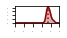

In [67]:
Red_ops = np.loadtxt("Data/Functional_trace_OpsinR.txt")
Green_ops = np.loadtxt("Data/Functional_trace_OpsinG.txt")
Blue_ops = np.loadtxt("Data/Functional_trace_OpsinB.txt")
UV_ops = np.loadtxt("Data/Functional_trace_OpsinU.txt")
l_array = np.flip(np.loadtxt("Data/Functional_trace_Opsin_wavelength.txt"))

Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)

Red_std = np.std(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
Green_std = np.std(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
Blue_std = np.std(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
UV_std = np.std(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)

U_Red = unumpy.uarray( Red_mean, Red_std )
U_Green = unumpy.uarray( Green_mean, Green_std )
U_Blue = unumpy.uarray( Blue_mean, Blue_std )

distance_RG = (U_Red**2 + U_Green**2)**(1/2)

kernel = stats.gaussian_kde(unumpy.std_devs(distance_RG))
position = np.linspace(0, 1, 50)
z = kernel(position)
plt.figure(figsize=(0.8, 0.3))
# plt.figure(figsize=(2.8, 1.3))
plt.plot(position, np.flip(z), color='darkred')
plt.fill_between(position, np.flip(z), alpha = 0.3, color='darkred')
plt.axvline(x=0.75, color = 'darkred', linestyle = ':')
plt.tick_params(labelsize='0')
plt.xlim(0, 1)
plt.ylim(0)
# plt.savefig('Plots/dist_std_repsonses.pdf', bbox_inches = 'tight')

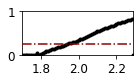

In [68]:
plt.figure(figsize = (2., 0.8))
# plt.plot(par_array, mean_d/np.max(mean_d), marker='.', color='k', linestyle=':')
plt.plot(par_array, mean_d, marker='.', color='k', linestyle='none')
plt.xlim(1.7, 2.29)
plt.ylim(-0.)
plt.tick_params(labelsize = 12)
plt.axhline(y = 0.25, color = 'darkred', linestyle = '-.', zorder = 10)
# plt.savefig('Plots/Ambiguity.pdf', bbox_inches = 'tight')